# Working with precipitation and temperature monthly values

You will need to:
- Import modules that are important to complete the work.
- Load the files and "understand" them.
- Join the files in a large matrix.
- Compute statistics.
- Save the files for later use.

Optionally:
- Create plots

### Do not forget to run all cells in order, from top to bottom. Failing to do so may cause errors.
### AI Large Language Models (such as deepseek) can help you a lot doing this.

## Modules

Some useful modules are:
- `pandas` (https://pandas.pydata.org/docs/getting_started/intro_tutorials/): to work with tabular data (including import and export). It is the "Microsoft Excel" of Python.
- `matplotlib` (https://matplotlib.org/stable/plot_types/index.html): to create figures (plots).
- `pathlib`: not as important. To handle folder and file paths.

## Import modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
file_path = Path(r'./Lab work/6606347/precipitation/UKE00105909.csv')

## Now let's read it with pandas

It is really this easy!

Check out the documentation here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [21]:
pd.read_csv(file_path)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,UKE00105909,1959-12-31,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,NaN,111.0,",,E",NaN,NaN
1,UKE00105909,1960-01-01,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,NaN,67.0,",I,E",94.0,",I,E"
2,UKE00105909,1960-01-02,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,NaN,106.0,",,E",44.0,",,E"
3,UKE00105909,1960-01-03,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,NaN,122.0,",,E",56.0,",,E"
4,UKE00105909,1960-01-04,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,NaN,78.0,",,E",56.0,",,E"
...,...,...,...,...,...,...,...,...,...,...,...,...
23376,UKE00105909,2025-01-27,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",48.0,",,E",89.0,",,E",38.0,",,E"
23377,UKE00105909,2025-01-28,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",16.0,",,E",78.0,",,E",47.0,",,E"
23378,UKE00105909,2025-01-29,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",0.0,",,E",79.0,",,E",21.0,",,E"
23379,UKE00105909,2025-01-30,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",48.0,",,E",80.0,",,E",-4.0,",,E"


## We can provide more information to the reader too
I wish to use the date as the row index.  
To parse the dates correctly as `datetime64[ns]` we use the `pd.to_datetime` function.   
    You can find all about the format here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior   
We also want to discard all columns beyond PRCP (precipitation)

### Precipitation data from this source (GHCN-Daily) is stored in 0.1 mm/day. We must convert to mm/day.
### Something similar happens with temprature

In [22]:
my_data = pd.read_csv(file_path, index_col=1, usecols=[0, 1, 2, 3, 4, 5, 6, 8, 10])
my_data.index = pd.to_datetime(my_data.index, format='%Y-%m-%d', errors='coerce')
my_data.iloc[:, -2:] /= 10
my_data.loc[:, 'TMEAN']  = (my_data.TMAX + my_data.TMIN) / 2

station = my_data.iloc[0, 0]
print(f'This station is {station}')

my_data

This station is UKE00105909


,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,TMAX,TMIN,TMEAN
DATE,,,,,,,,,
1959-12-31,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,11.1,NaN,NaN
1960-01-01,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,6.7,9.4,8.05
1960-01-02,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,10.6,4.4,7.50
1960-01-03,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,12.2,5.6,8.90
1960-01-04,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",NaN,7.8,5.6,6.70
...,...,...,...,...,...,...,...,...,...
2025-01-27,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",48.0,8.9,3.8,6.35
2025-01-28,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",16.0,7.8,4.7,6.25
2025-01-29,UKE00105909,52.2058,-1.6031,47.0,"WELLESBOURNE, UK",0.0,7.9,2.1,5.00


## Let's see what the data looks like
Using matplotlib (included in pandas).  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<Axes: xlabel='DATE'>

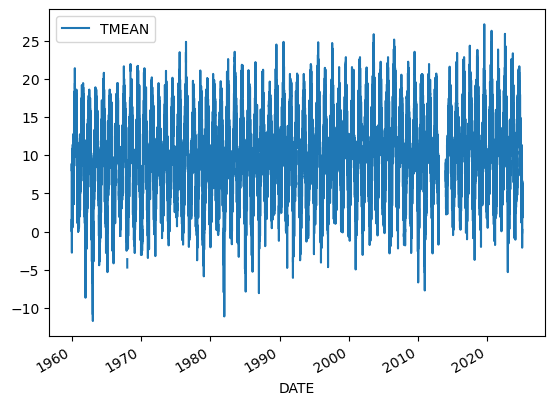

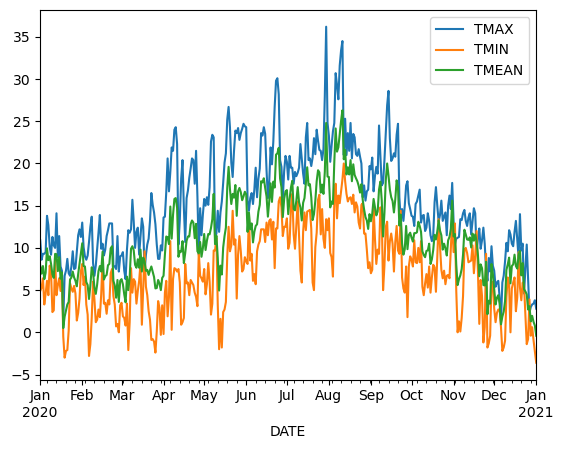

In [23]:
my_data.iloc[:, -1:].plot()
my_data.loc['2020-01-01':'2021-01-01', :].iloc[:, -3:].plot()

In [25]:
monthly_temperature_data = my_data.loc[:, ['TMAX', 'TMIN', 'TMEAN']].resample('MS').mean().dropna()
monthly_data.tail(5)

,TMAX,TMIN,TMEAN
DATE,,,
2024-09-01,18.253333,10.260000,14.256667
2024-10-01,15.361290,7.903226,11.632258
2024-11-01,10.633333,4.313333,7.473333
2024-12-01,9.274194,4.619355,6.946774
2025-01-01,6.253333,0.019355,3.130000


## Let's compute statistics
We can use .agg

In [14]:
stats = yearly_data.agg(['mean', 'std', 'count', 'min', 'max', 'skew'])
stats.loc['cv'] = stats.loc['std'] / stats.loc['mean']
stats

,TMEAN
mean,10.021396
std,0.817459
count,53.000000
min,7.498493
max,11.941233
skew,-0.303539
cv,0.081571


## Now let's join, change the header, and export to Excel

In [16]:
joint = pd.concat([yearly_data, stats], axis=0)
joint.columns = pd.MultiIndex.from_product([['Average temperature [C]'], [station]], names=['Variable', 'Station'])

joint.to_excel(f'parsed_{station}.xlsx')

joint

Variable,Average temperature [C]
Station,UKE00105909
1960-04-01 00:00:00,9.958630
1961-04-01 00:00:00,9.202466
1962-04-01 00:00:00,7.498493
1963-04-01 00:00:00,8.840822
1964-04-01 00:00:00,9.116438
1965-04-01 00:00:00,9.007260
1969-04-01 00:00:00,9.268356
1970-04-01 00:00:00,9.778767
1972-04-01 00:00:00,9.131918


## Now the magic begins to happen...
Lets do this for all stations at once!

First, use `glob` to get all files with the `.csv` extension in the `precipitation` folder

In [24]:
all_data = []
for file in folder_path.glob('*.csv'):
    station = file.name.replace('.csv','')
    _data = pd.read_csv(file, index_col=0, usecols=[1, 6])
    _data.index = pd.to_datetime(_data.index, format='%Y-%m-%d', errors='coerce')
    _data.PRCP /= 10

    _data = _data.loc[:, ['PRCP']].resample('YS-APR').sum(min_count=365).dropna()
    _data.columns = pd.MultiIndex.from_product([['Precipitation [mm/year]'], [station]], names=['Variable', 'Station'])

    all_data.append(_data)

full_dataset = pd.concat(all_data, axis=1)

stats = full_dataset.agg(['mean', 'std', 'count', 'min', 'max', 'skew'], axis=0)
stats.loc['cv',:] = stats.loc['std',:] / stats.loc['mean',:]
joint = pd.concat([full_dataset, stats], axis=0)
    
joint.tail(10)

Variable            Precipitation [mm/year]                            \
Station                         UK000056225  UKE00102158  UKE00105869   
2021-04-01 00:00:00                     NaN   682.600000   727.400000   
2022-04-01 00:00:00                     NaN   798.200000   802.200000   
2023-04-01 00:00:00                     NaN  1187.400000  1221.400000   
mean                             653.128351   747.850000   814.322951   
std                              123.334204   147.013286   147.612095   
count                            194.000000    60.000000    61.000000   
min                              396.700000   477.000000   499.600000   
max                             1088.100000  1187.400000  1242.300000   
skew                               0.271929     0.789523     0.756702   
cv                                 0.188836     0.196581     0.181270   

Variable                                                               \
Station             UKE00105909  UKE00105911  UKE00105915 UKE00105922   
2021-04-01 00:00:00  548.800000          NaN          NaN         NaN   
2022-04-01 00:00:00         NaN          NaN          NaN         NaN   
2023-04-01 00:00:00  897.800000          NaN          NaN         NaN   
mean                 617.179310   761.635870   717.688000  610.076744   
std                  115.300705   130.628584   137.415321  108.549883   
count                 58.000000    92.000000    50.000000   43.000000   
min                  353.700000   431.300000   392.000000  376.000000   
max                  897.800000  1113.400000  1177.700000  938.400000   
skew                  -0.161703     0.089856     0.684149    0.152325   
cv                     0.186819     0.171511     0.191469    0.177928   

Variable                                                                \
Station              UKE00105923  UKE00105924  UKE00105925 UKE00107650   
2021-04-01 00:00:00          NaN          NaN          NaN  603.000000   
2022-04-01 00:00:00   864.700000          NaN          NaN  635.200000   
2023-04-01 00:00:00  1218.000000          NaN          NaN  842.400000   
mean                  852.950943   773.297619   803.090000  618.546774   
std                   184.252344   155.553014   148.532927  116.027619   
count                  53.000000    42.000000    50.000000   62.000000   
min                   473.500000   480.500000   513.300000  328.000000   
max                  1396.500000  1283.400000  1327.800000  965.800000   
skew                    0.901488     0.943070     0.885098    0.089466   
cv                      0.216018     0.201155     0.184952    0.187581   

Variable                                                               
Station              UKE00107962 UKM00003740 UKM00003772  UKM00003862  
2021-04-01 00:00:00   630.400000         NaN         NaN          NaN  
2022-04-01 00:00:00   755.800000         NaN  580.500000          NaN  
2023-04-01 00:00:00   961.600000         NaN         NaN          NaN  
mean                  727.518750       968.1  634.800000  1011.950000  
std                   121.142846         NaN   86.290063   181.372889  
count                  48.000000         1.0    5.000000     2.000000  
min                   498.700000       968.1  528.200000   883.700000  
max                  1044.200000       968.1  728.400000  1140.200000  
skew                    0.203891         NaN   -0.017107          NaN  
cv                      0.166515         NaN    0.135933     0.179231

## Can you add the statistics and save to an Excel file?

In [26]:
joint.iloc[-7:,:].transpose().to_csv('precipitation_yearly.csv')

